# COGS 108 - Final Project 

# Overview

As a current student of UCSD, I've always enjoyed the parks and beaches around San Diego. I also have met several San Diego locals who told me proudly that they have the best park, beaches and open space in the state and even the entire country. However, while having these resources is nice, what matters is if people can access them in real life. Per my personal experiences, the good spots are either too far away from where people live, such as Polomar Mountain, or easily get way too crowded to be enjoyable, such as Balboa Park. Therefore, I doubt if people in San Diego actually have as good access to all the recreational locations around them as they'd like to belive, especially compared to the rest of California.

# Name & GitHub ID

- Name: Huiran Song
- GitHub Username: Hrann

# Research Question

Do the residents of San Diego County have less access to park and recreation resources than residents of other counties in California? 

## Background and Prior Work

There was a viral video on Tiktok a few days ago recommending a local public park to people [1]. Because of the algorithm, a lot of San Diego residents who are on Tiktok got that video in their feed, and they were not happy about it: hundreds of the comments under that video were all complaining about the author sharing this park because there were already so many people hanging out there all the time that the people don't want any more traffic. Them gate-keeping this park induces even more controversy in the comment section; people from other counties in California and out of state are wondering if San Diego, despite being famous for its beautiful natural beaches and outdoor culture, actually doesn't have enough public rereational space. 

Though this video only mentions this specifc park, the response speaks of the general problem of park shortage in San Diego. Maybe being the 2nd most populated county in the state and 8th in the country [2] San Diego does have less park and recreational resources per capita than people think. Daring to dig under the facade of San Diegans' pride and joy, I want to ask: Are people in San Diego park-deficient? Moreover, are San Diegans more park-deficient than people in other parts of California, contrary to its reputation?

Even though it's proven that having access to parks and other recreational facilities is directly related to building a healthy lifestyle [3] and improving physical wellness of the population [4], there's not much prior work done properly on the specific question, that if people in San Diego have less park and recreational resources than the rest of California. In 2013, a neighborhood-by-neighborhood area planning project says if a healthy stardard requires 2.8 Acres of park area per 1,000 residents, 85% of the neighborhoods in San Diego is park-deficient [5]. However, layer a third-party analyst reported an error in their statistics saying they left out some parks that don't quite belong to any specific neighborhoods [6]. Another news coverage pertaining to this topic in 2018 also asserts that some local neighboorhoods suffer from park shortage, but it lacks statistical evidence and only has interviews with some residents to back up their statement [7]. 

Overall, there's still plenty of a scope for more research, especially from a data scientist's point of view with statistical evidence in large amount.


References (include links):
- 1) https://en.wikipedia.org/wiki/San_Diego
- 2) https://www.tiktok.com/@myexplorewithme/video/6885531389496659205?lang=en&sender_device=pc&sender_web_id=6886655009028343302&is_from_webapp=1
- 3) https://www.sciencedirect.com/science/article/abs/pii/S0749379704003071
- 4) https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1408694
- 5) https://voiceofsandiego.org/wp-content/uploads/2013/10/ParkDoc.pdf
- 6) https://www.voiceofsandiego.org/parks/fact-check-san-diegos-park-shortage/
- 7) https://www.kpbs.org/news/2018/may/03/parts-san-diego-have-park-shortage/

# Hypothesis


Combining me and my friends' experiences with the background research from news and journals as cited above together, I'm going to hypothesize that people in San Diego County actually have do have les access to parks, beaches and other relational locations than people in other counties in California in average.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
# Read in data
hci = pd.read_excel('hci_accesstoparks_469_ca_re_co_cd_pl_ct-7-3-2017-ada.xlsx')

# Data Cleaning

First, we need to separate our control group (San Diego) from the entire dataset from California.

In [3]:
# Separate the HCI dataset into two data frames
# Data from San Diego
SD = hci[hci['region_code'] == 9]
# Data from the rest of California
not_SD = hci[hci['region_code'] != 9]

Then we further clean the two data frames by trimming off the unusable rows and irrelavent columns.

In [4]:
# Drop rows that are missing values in critical columns
SD = SD.dropna(subset = ['region_code', 'estimate'])
not_SD = not_SD.dropna(subset = ['region_code', 'estimate'])

SD = SD.drop(['ind_id', 'ind_definition', 'reportyear', 'race_eth_code', 'race_eth_name', 'county_fips', 'strata_one_code', 'strata_one_name', 'strata_two_code', 'strata_two_name', 'numerator', 'denominator', 'll_95ci', 'ul_95ci', 'se', 'rse', 'version', 'region_name', 'region_code', 'geotype', 'geotypevalue'], axis = 1)
not_SD = not_SD.drop(['ind_id', 'ind_definition', 'reportyear', 'race_eth_code', 'race_eth_name', 'county_fips', 'strata_one_code', 'strata_one_name', 'strata_two_code', 'strata_two_name', 'numerator', 'denominator', 'll_95ci', 'ul_95ci', 'se', 'rse', 'version', 'region_name', 'region_code', 'geotype', 'geotypevalue'], axis = 1)

print(SD.head(3))
print(not_SD.head(3))

          geoname county_name   estimate  ca_decile    ca_rr
13500  Alpine CCD   San Diego   0.000000        NaN  0.00000
13501  Alpine CCD   San Diego   0.000000        NaN  0.00000
13502  Alpine CCD   San Diego  22.162162        NaN  2.91442
        geoname county_name  estimate  ca_decile     ca_rr
54  Alameda CCD     Alameda  97.57085        NaN  2.013465
55  Alameda CCD     Alameda   0.00000        NaN  0.000000
56  Alameda CCD     Alameda   0.00000        NaN  0.000000


Then we inspect all the potentially useful data.

In [5]:
print(SD.head)
print(not_SD.head)

<bound method NDFrame.head of            geoname county_name   estimate  ca_decile     ca_rr
13500   Alpine CCD   San Diego   0.000000        NaN  0.000000
13501   Alpine CCD   San Diego   0.000000        NaN  0.000000
13502   Alpine CCD   San Diego  22.162162        NaN  2.914420
13503   Alpine CCD   San Diego   0.000000        NaN  0.000000
13504   Alpine CCD   San Diego  35.135135        NaN  3.324591
...            ...         ...        ...        ...       ...
542911   San Diego         NaN   9.280742        NaN  1.029175
542912   San Diego         NaN   3.304189        NaN  1.004570
542913   San Diego         NaN   3.181003        NaN  1.202220
542914   San Diego         NaN   8.672661        NaN  0.725351
542915   San Diego         NaN  81.323698        NaN  1.065387

[37158 rows x 5 columns]>
<bound method NDFrame.head of                     geoname county_name   estimate  ca_decile     ca_rr
54              Alameda CCD     Alameda  97.570850        NaN  2.013465
55           

From observation the printed rows, we know there could be multiple values missing in the county_name and ca_decile column.
If there are too many values missing in one column, it might interfere with our analysis. We need to find out if these two columns are still worth keeping in the next step.

In [6]:
# Make rows missing these values a separate data frame
SD_CN = SD[SD['county_name'].isnull()]
SD_CD = SD[SD['ca_decile'].isnull()]
not_SD_CN = not_SD[not_SD['county_name'].isnull()]
not_SD_CD = not_SD[not_SD['ca_decile'].isnull()]

print("Number of missing county names in SD: " + str(SD_CN.shape[0]))
print("Number of missing decile in SD: " + str(SD_CD.shape[0]))
print("Number of missing county names not in SD: " + str(not_SD_CN.shape[0]))
print("Number of missing decile not in SD: " + str(not_SD_CD.shape[0]))

Number of missing county names in SD: 54
Number of missing decile in SD: 37105
Number of missing county names not in SD: 702
Number of missing decile not in SD: 484111


As we can see, there are a lot of decile values missing in both data frames. Therefore, we want to drop this column.

In [7]:
SD = SD.drop(['ca_decile'], axis = 1)
not_SD = not_SD.drop(['ca_decile'], axis = 1)

Now, we want to see the how all the numerical values look together to make sure the cleaning was done properly, before we dive into the analysis. 

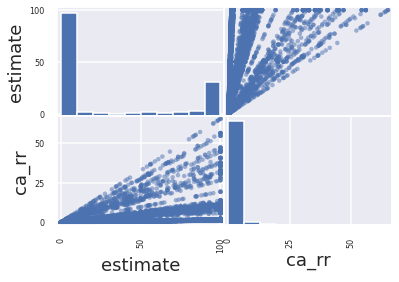

In [8]:
fig_SD = pd.plotting.scatter_matrix(SD[['estimate', 'ca_rr']])

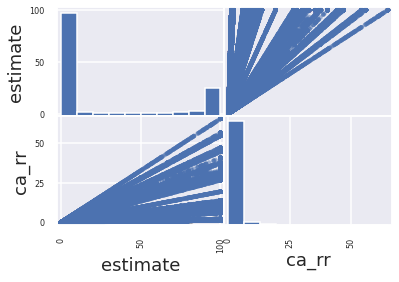

In [9]:
fig_not_SD = pd.plotting.scatter_matrix(not_SD[['estimate', 'ca_rr']])

# Data Analysis & Results

Now we want to graph the estimate and the state ratio separately for both San Diego and non San Diego data.

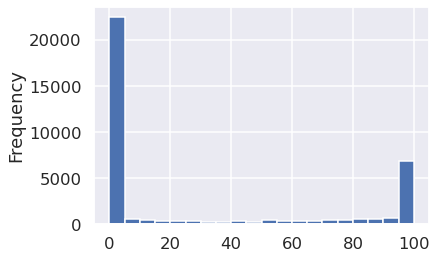

In [10]:
est_SD = SD['estimate'].plot.hist(bins = 20)

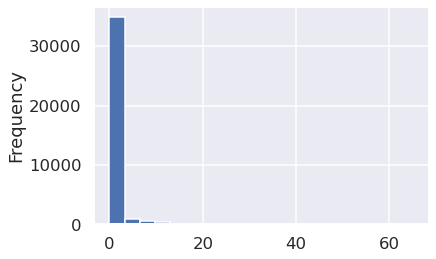

In [11]:
rr_SD = SD['ca_rr'].plot.hist(bins = 20)

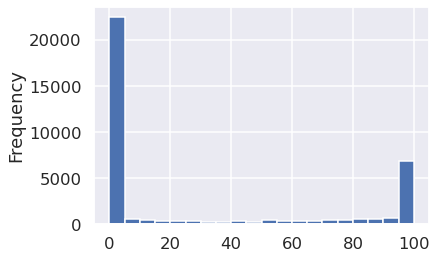

In [12]:
est_SD = SD['estimate'].plot.hist(bins = 20)

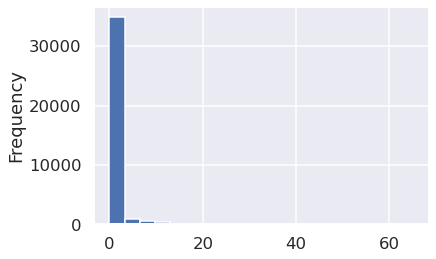

In [13]:
rr_not_SD = SD['ca_rr'].plot.hist(bins = 20)

These plots all have an extraordinary number of 0 values. Now we know there are a lot of park, peach and public space locations that have 0 resident living within the 1/2 mile radius. Nevertheless, there are also a lot of units where 100% of the residents live wthin in the 1/2 mile radius, meaning they get pretty good access and enjoy the location around them.

To further differentiate the two dataframes, we plot them again excluding all the 0 values. Especially for the state ratio column, since the count of 0's is extremely high, we want to further remove all the values below 3 percent (i.e. values in the first bin).

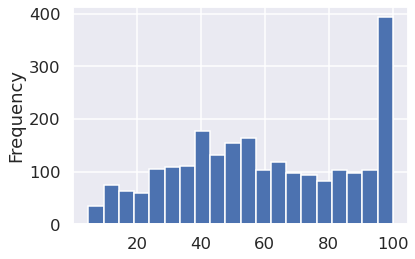

In [14]:
SD_0 = SD[(SD['estimate'] != 0) & (SD['ca_rr'] > 3)]
not_SD_0 = not_SD[(not_SD['estimate'] != 0) & (not_SD['ca_rr'] > 3)]

est_SD_0 = SD_0['estimate'].plot.hist(bins = 20)

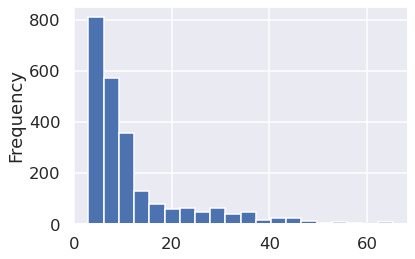

In [15]:
rr_SD_0 = SD_0['ca_rr'].plot.hist(bins = 20)

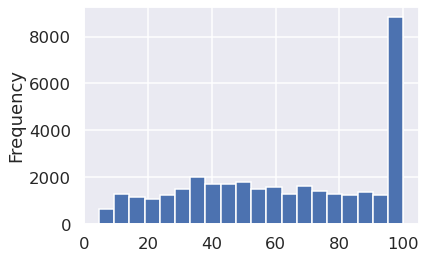

In [16]:
est_not_SD_0 = not_SD_0['estimate'].plot.hist(bins = 20)

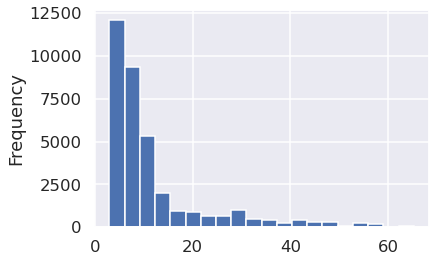

In [17]:
rr_not_SD_0 = not_SD_0['ca_rr'].plot.hist(bins = 20)

As illustrated in the graphs above, even though there're still many extreme values from both data frames and the state ratios don't seem to be very different, the graph of estimate from San Diego is obviously more left-skewed than the graph from other parys of California. Therefore, San Diego probably has a higher percentage of population living within 1/2 mile to a park, beach or other recreational location than the other places in California, meaning more people in San Diego can enjoy parks and beaches conveniently.

In [18]:
avg_rr_SD = SD['ca_rr'].mean()
avg_rr_not_SD = not_SD['ca_rr'].mean()
print(avg_rr_SD)
print(avg_rr_not_SD)

avg_est_SD = SD['estimate'].mean()
avg_est_not_SD = not_SD['estimate'].mean()
print(avg_est_SD)
print(avg_est_not_SD)

1.192453232558842
1.233224850145231
29.470941989860926
26.809416150039034


On the other hand, if we put back all the close-to-zero values, just by calculating average, the values seem to give inconsistent results, given San Diego having a lower to-state ratio than the other part of California, despite having a higher estimate value on average. Therefore, we need to run a test to resolve the conflicting results. 
Because the sizes of both data frames are large enough, we can run a t-test.

In [19]:
t_est, p_est = stats.ttest_ind(SD['estimate'].values, not_SD['estimate'].values)
print(p_est)

1.9415218321682692e-35


In [20]:
t_rr, p_rr = stats.ttest_ind(SD['ca_rr'].values, not_SD['ca_rr'].values)
print(p_rr)

0.0727629249182096


By a 95% confidence interval, we reject that there's a significant difference between the two data frames.
In other words, we've landed on the conclusion that San Diego peole don't suffer from less access to public reactional spaces.

# Ethics & Privacy

Since the data are collected from different geo units from census tracts and counties to state and the units are already encoded to not show any name, the dataset itself is pretty secure from any ethic and privacy issues.
Moreover, the dataset is extremely big in size with over 543k entries, it's unlikely that whoever try to hack it would get anything very specific, such as information about a zip code or any neighborhood, from doing data analysis. 
One thing I did notice from observing the dataset in the beginning was the mapping from MPO regions to counties. San Diego as an MPO region only map to one county, San Diego County. However, since this project doesn't concern the difference between MPO region and county, we can pass on this issue.

# Conclusion & Discussion

In conclusion, San Diegans don't have more or less access to public recreational facilities than other people in California.
However, since the dataset we use include data from different levels of geo units, we might have repititions from sources. If we can have access to a more uniform common census on this issue, we might be able to draw a more significant conclusion.
The amount of 0's in estimate also concerns me, because it would mean that a lot of public recreational locatioins don't have any people living close to it. If we can have separate data from these locations, another interesting data project might be in sight.